In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn import metrics

In [24]:
from pandas_datareader import data as pdr
import fix_yahoo_finance as yf
yf.pdr_override()

ModuleNotFoundError: No module named 'fix_yahoo_finance'

In [5]:
pip install pandas_datareader

Note: you may need to restart the kernel to use updated packages.


In [6]:
df = pd.read_csv("Stock.csv")

In [7]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,6/1/17,241.970001,243.380005,241.639999,243.360001,233.122589,68962000
1,6/2/17,243.419998,244.350006,243.080002,244.169998,233.898560,88666100
2,6/5/17,243.970001,244.300003,243.759995,243.990005,233.726135,44698800
3,6/6/17,243.339996,243.979996,243.119995,243.210007,232.978943,50375400
4,6/7/17,243.600006,243.919998,242.830002,243.660004,233.410004,54144300
5,6/8/17,243.770004,244.330002,243.169998,243.779999,233.524963,65950700
6,6/9/17,244.089996,245.009995,241.949997,243.410004,233.170502,132256400
7,6/12/17,243.130005,243.419998,242.380005,243.360001,233.122589,86108100
8,6/13/17,243.979996,244.610001,243.580002,244.550003,234.262573,60067000
9,6/14/17,244.860001,244.869995,243.289993,244.240005,233.965591,78602300


In [8]:
df = pdr.get_data_yahoo('SPY','06-01-2017','05-31-2018')
df = df.dropna()
df = df.iloc[:,:4]
df.head()

,High,Low,Open,Close
Date,,,,
2017-06-01,243.380005,241.639999,241.970001,243.360001
2017-06-02,244.350006,243.080002,243.419998,244.169998
2017-06-05,244.300003,243.759995,243.970001,243.990005
2017-06-06,243.979996,243.119995,243.339996,243.210007
2017-06-07,243.919998,242.830002,243.600006,243.660004


In [183]:
df['S_10'] = df['Close'].rolling(window=10).mean()
df['Corr'] = df['Close'].rolling(window=10).corr(df['S_10'])
df['Open-Close'] = df['Open'] - df['Open'].shift(1)
df = df.dropna()
x = df.iloc[:,:4]

In [184]:
y = np.where (df['Close'].shift(-1) > df["Close"],1,-1)

In [185]:
split = int(0.7*len(df))
X_train, x_test, y_train, y_test = x[:split],x[split:],y[:split],y[split:]

In [186]:
model = LogisticRegression()
model = model.fit (X_train, y_train)

/Users/maccs2/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [187]:
pd.DataFrame(zip(x.columns, np.transpose(model.coef_)))

,0,1
0,High,[-0.03154259658512161]
1,Low,[-0.2845856746428873]
2,Open,[0.13715640515398891]
3,Close,[0.17749054351856344]


In [188]:
probability = model.predict_proba(x_test)
print(probability)

[[0.51856355 0.48143645]
 [0.45673859 0.54326141]
 [0.43047085 0.56952915]
 [0.45732048 0.54267952]
 [0.31998628 0.68001372]
 [0.38890515 0.61109485]
 [0.4730121  0.5269879 ]
 [0.47293678 0.52706322]
 [0.48317458 0.51682542]
 [0.39316427 0.60683573]
 [0.49077931 0.50922069]
 [0.32738273 0.67261727]
 [0.37374328 0.62625672]
 [0.50946608 0.49053392]
 [0.4492745  0.5507255 ]
 [0.45235652 0.54764348]
 [0.49174522 0.50825478]
 [0.49525917 0.50474083]
 [0.51185498 0.48814502]
 [0.47007195 0.52992805]
 [0.5207754  0.4792246 ]
 [0.50869105 0.49130895]
 [0.52612228 0.47387772]
 [0.52001076 0.47998924]
 [0.49982058 0.50017942]
 [0.46654245 0.53345755]
 [0.41619569 0.58380431]
 [0.52435744 0.47564256]
 [0.4415198  0.5584802 ]
 [0.47999667 0.52000333]
 [0.48124677 0.51875323]
 [0.51299389 0.48700611]]


In [189]:
predicted = model.predict(x_test)

In [208]:
cross_val = cross_val_score(LogisticRegression(), x, y, scoring='accuracy', cv=10)
print (cross_val)


print (cross_val.mean())

[0.27272727 0.45454545 0.45454545 0.45454545 0.81818182 0.54545455
 0.3        0.6        0.8        0.33333333]
0.5033333333333333


/Users/maccs2/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/maccs2/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/maccs2/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/maccs2/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/maccs2/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to '

In [209]:
print(metrics.confusion_matrix(y_test,predicted))

[[ 8  9]
 [ 1 14]]


In [210]:
print(metrics.classification_report(y_test,predicted))

              precision    recall  f1-score   support

          -1       0.89      0.47      0.62        17
           1       0.61      0.93      0.74        15

   micro avg       0.69      0.69      0.69        32
   macro avg       0.75      0.70      0.68        32
weighted avg       0.76      0.69      0.67        32



In [211]:
print(model.score(x_test,y_test))

0.6875


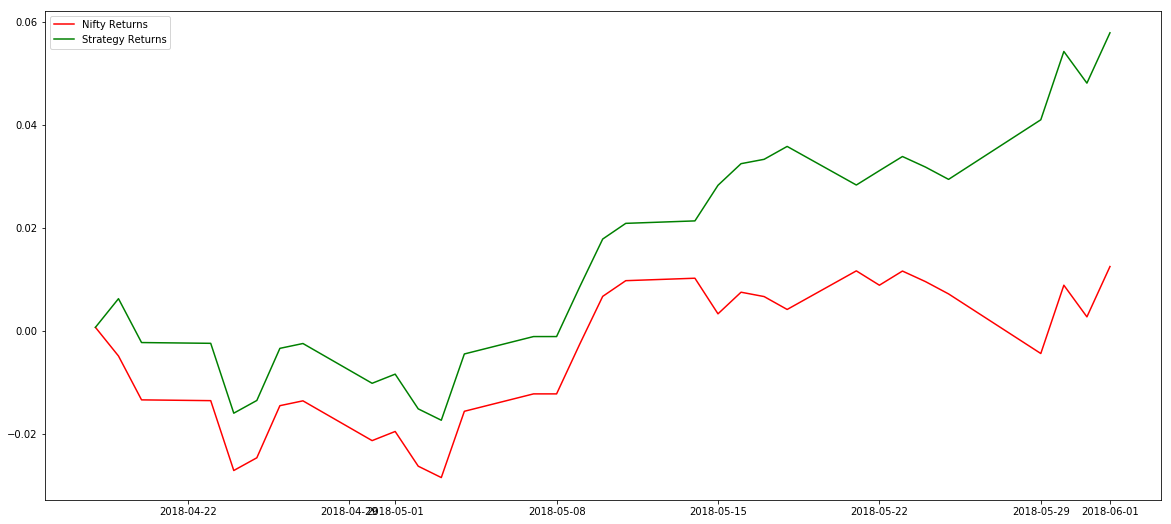

In [207]:
df['Predicted_Signal'] = model.predict(x)
df['Nifty_returns'] = np.log(df['Close']/df['Close'].shift(1))
Cumulative_Nifty_returns = np.cumsum(df[split:]['Nifty_returns'])
df['Startegy_returns'] = df['Nifty_returns']* df['Predicted_Signal'].shift(1)
Cumulative_Strategy_returns = np.cumsum(df[split:]['Startegy_returns'])
plt.figure(figsize=(20,9))
plt.plot(Cumulative_Nifty_returns, color='r',label = 'Nifty Returns')
plt.plot(Cumulative_Strategy_returns, color='g', label = 'Strategy Returns')
plt.legend()
plt.show()